In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *

In [3]:
torch.cuda.set_device(2)

In [4]:
bs = 64  
mypath=Path('/data2/itahir/MedstarProject')

In [5]:
data_lm = load_data(mypath, 'p_all_data_lm2.pkl', bs=bs)

# Data Split

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

In [7]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

In [8]:
pwd

'/data2/itahir/MedstarProject/pathology'

In [9]:
data=pd.read_csv('/data2/itahir/MedstarProject/pathology/data_2015_2018.csv')

In [10]:
data.head()

,Unnamed: 0,Path,Notes,File name,text
0,0,Benign,NaN,9ae0ad5a60c745805466caa5dd4e29a7.txt,Source of Specimen\nA\tLeft Breast Cyst (9 o'c...
1,1,Benign,NaN,ed607e409c73353f0d0ab94d5cca1b6e.txt,Source of Specimen\nA\tRight breast cores\nB\t...
2,3,Benign,NaN,fbf2e75883507455721fa410cefe8213.txt,"Addendum\nAfter discussion with a radiologist,..."
3,4,Benign,NaN,6aaec96d9a3c31aa9711bc453dbaea73.txt,Source of Specimen\nA\tRight breast core bx\nC...
4,5,Benign,NaN,7c6a5ffcad9f0b91b4189c2a504c4a42.txt,Source of Specimen\nA\tRight breast cores with...


In [11]:
data.drop('Unnamed: 0', axis=1,inplace=True)

In [13]:
data['Path'].value_counts()

Benign       2720
Malignant     908
Name: Path, dtype: int64

In [15]:
df=data.loc[data.Path!='Malignant']

In [16]:
df['Path'].value_counts()

Benign    2720
Name: Path, dtype: int64

In [22]:
df1=df[df['Notes'].isna()]

In [19]:
df['Notes'].unique()

array([nan, 'HRL'], dtype=object)

In [23]:
df2=df[df['Notes']=='HRL']

In [21]:
2421+299

2720

In [24]:
df1['label']=['Benign']*2421
df2['label']=['Benign,HRL']*299

/data2/itahir/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/data2/itahir/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
df=pd.concat([df1,df2])

In [27]:
df['label'].value_counts()

Benign        2421
Benign,HRL     299
Name: label, dtype: int64

In [30]:
df.to_csv('data_step2_all.csv')

In [12]:
df=pd.read_csv('data_step2_all.csv')

In [13]:
df.head()

,Unnamed: 0,Path,Notes,File name,text,label
0,0,Benign,NaN,9ae0ad5a60c745805466caa5dd4e29a7.txt,Source of Specimen\nA\tLeft Breast Cyst (9 o'c...,Benign
1,1,Benign,NaN,ed607e409c73353f0d0ab94d5cca1b6e.txt,Source of Specimen\nA\tRight breast cores\nB\t...,Benign
2,2,Benign,NaN,fbf2e75883507455721fa410cefe8213.txt,"Addendum\nAfter discussion with a radiologist,...",Benign
3,3,Benign,NaN,6aaec96d9a3c31aa9711bc453dbaea73.txt,Source of Specimen\nA\tRight breast core bx\nC...,Benign
4,4,Benign,NaN,7c6a5ffcad9f0b91b4189c2a504c4a42.txt,Source of Specimen\nA\tRight breast cores with...,Benign


In [14]:
df.drop('Unnamed: 0', axis=1,inplace=True)

In [15]:
df.head()

,Path,Notes,File name,text,label
0,Benign,NaN,9ae0ad5a60c745805466caa5dd4e29a7.txt,Source of Specimen\nA\tLeft Breast Cyst (9 o'c...,Benign
1,Benign,NaN,ed607e409c73353f0d0ab94d5cca1b6e.txt,Source of Specimen\nA\tRight breast cores\nB\t...,Benign
2,Benign,NaN,fbf2e75883507455721fa410cefe8213.txt,"Addendum\nAfter discussion with a radiologist,...",Benign
3,Benign,NaN,6aaec96d9a3c31aa9711bc453dbaea73.txt,Source of Specimen\nA\tRight breast core bx\nC...,Benign
4,Benign,NaN,7c6a5ffcad9f0b91b4189c2a504c4a42.txt,Source of Specimen\nA\tRight breast cores with...,Benign


In [16]:
for train_index, test_index in split.split(df,df['label']):
    train=df.loc[train_index]
    test=df.loc[test_index]

# Classifier

In [17]:
data_clas = TextDataBunch.from_df(path=mypath, train_df=train, valid_df=test, text_cols=['text'], label_cols='label', 
                                  vocab=data_lm.vocab)

In [40]:
data_clas.save('stepwise_all_data_clas.pkl')

In [18]:
data_clas = load_data(mypath, 'stepwise_all_data_clas.pkl', bs=bs)

In [19]:
kappa = KappaScore()
kappa.weights = "quadratic"

In [20]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.3,metrics=[kappa, accuracy, error_rate])
learn.load_encoder('p_all_fine_tuned_enc_6'); #p_all_fine_tuned_enc_6

In [21]:
learn.load('p_all_fourth_00');#p_all_fourth_00

In [51]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


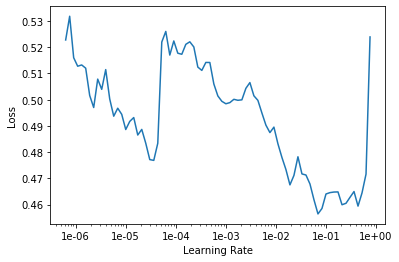

In [52]:
learn.recorder.plot()

In [53]:
learn.fit_one_cycle(1, 2e-3, moms=(0.8,0.7))  

epoch,train_loss,valid_loss,kappa_score,accuracy,error_rate,time
0,0.452521,0.476035,0.106022,0.886029,0.113971,00:09


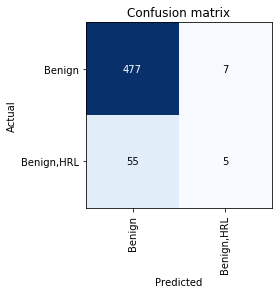

In [54]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [55]:
learn.save('step_all_first-00')

In [56]:
learn.load('step_all_first-00');

In [57]:
learn.freeze_to(-2)

In [58]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


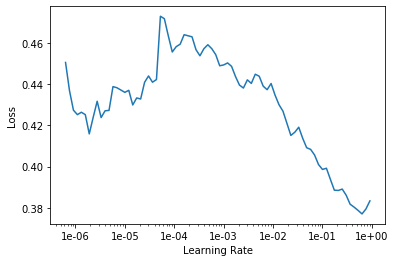

In [59]:
learn.recorder.plot()

In [60]:
learn.fit_one_cycle(4, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,kappa_score,accuracy,error_rate,time
0,0.399084,0.946554,0.488885,0.913603,0.086397,00:10
1,0.277973,0.282754,0.598293,0.933824,0.066176,00:10
2,0.206475,0.457411,0.661790,0.937500,0.062500,00:10
3,0.153947,1.509840,0.700275,0.941176,0.058824,00:10


In [61]:
learn.fit_one_cycle(4, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,kappa_score,accuracy,error_rate,time
0,0.092982,0.295231,0.619383,0.935662,0.064338,00:10
1,0.108838,0.391482,0.620610,0.937500,0.062500,00:10
2,0.097886,0.252251,0.715865,0.943015,0.056985,00:10
3,0.074221,0.395118,0.722293,0.946691,0.053309,00:10


In [62]:
learn.save('step_all_second-00')

In [99]:
learn.load('step_all_second-00');

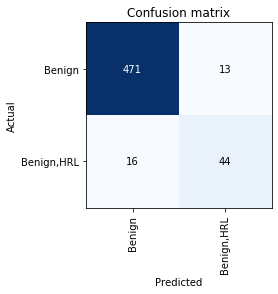

In [100]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [101]:
learn.freeze_to(-3)

In [102]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


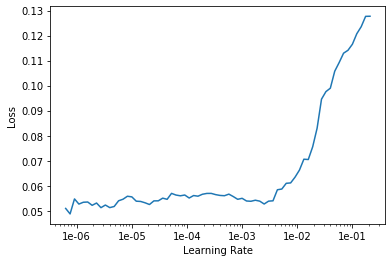

In [103]:
learn.recorder.plot()

In [104]:
learn.fit_one_cycle(2, slice(1e-5,1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,kappa_score,accuracy,error_rate,time
0,0.051741,0.345136,0.729852,0.948529,0.051471,00:14
1,0.053139,0.557601,0.749149,0.952206,0.047794,00:14


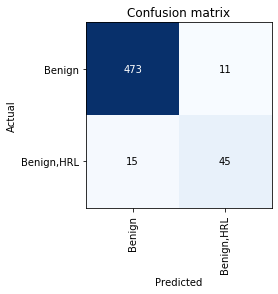

In [105]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [106]:
learn.save('step_all_third-00')

In [138]:
learn.load('step_all_third-00');

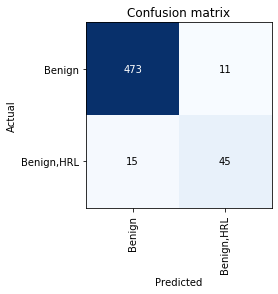

In [139]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [140]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


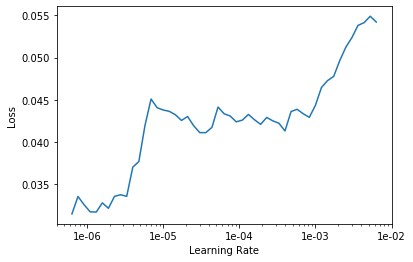

In [129]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [141]:
learn.fit_one_cycle(1, 1e-8, moms=(0.8,0.7))

epoch,train_loss,valid_loss,kappa_score,accuracy,error_rate,time
0,0.042833,0.233923,0.737741,0.948529,0.051471,00:17


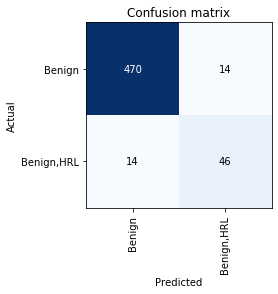

In [142]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [22]:
learn.load('step_all_third-00');

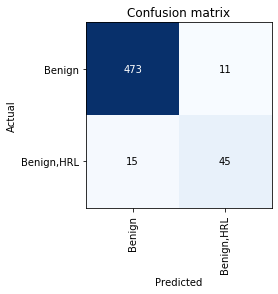

In [23]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [24]:
preds, _ = learn.get_preds(ds_type=DatasetType.Valid,ordered=True)

In [25]:
learn.data.classes

['Benign', 'Benign,HRL']

In [26]:
labels = np.argmax(preds, 1)

In [27]:
len(labels)

544

In [28]:
test['labels']=labels

In [29]:
test['Predicted']=[learn.data.classes[int(x)] for x in labels]

In [30]:
test.head()

,Path,Notes,File name,text,label,labels,Predicted
2314,Benign,NaN,03350878043b46fd3ebf251c2d1d512a.txt,Source of Specimen\nA\tCore biopsy of left bre...,Benign,0,Benign
1021,Benign,NaN,7472acae8d3c9c0d0f0dc14e6eefdcd4.txt,Source of Specimen\nA\tLT BREAST 14 GAUGE USG ...,Benign,0,Benign
1664,Benign,NaN,aeba1c3bf2c6e16c262e23525f8a1867.txt,Source of Specimen\nA\t14 g Core Biopsy Right ...,Benign,0,Benign
835,Benign,NaN,6d75cb3c4382a955ae1a86227b5dca96.txt,Source of Specimen\nA\tRight breast biopsy wit...,Benign,0,Benign
853,Benign,NaN,43c97239c5e548f29fe464f4650a6b5d.txt,Source of Specimen\nA\tRight breast core bx\nC...,Benign,0,Benign


In [31]:
((test['Predicted']=='Benign') &(test['label']=='Benign,HRL')).sum()

15

In [32]:
((test['Predicted']=='Benign,HRL') &(test['label']=='Benign')).sum()

11

In [33]:
((test['Predicted']=='Benign') &(test['label']=='Benign')).sum()

473

In [34]:
((test['Predicted']=='Benign,HRL') &(test['label']=='Benign,HRL')).sum()

45

In [40]:
df1=test[(test['Predicted']=='Benign') &(test['label']=='Benign,HRL')]

In [41]:
df1.to_csv('mis_BinignHRL_all_step2.csv')

In [42]:
df2=test[(test['Predicted']=='Benign,HRL') &(test['label']=='Benign')]

In [43]:
df2.to_csv('mis_Binign_all_step2.csv')